In [7]:
import os
import numpy as np
import pandas as pd

BASE_DIR = os.getcwd()

PROJECT_ROOT_DIR = os.path.abspath(os.path.join(BASE_DIR, ".."))

PTB_DIR = os.path.join(PROJECT_ROOT_DIR, "PTB-XL")

DATABASE_PATH= os.path.join(PTB_DIR,"ptbxl_database.csv")

STATEMENTS_PATH= os.path.join(PTB_DIR,"scp_statements.csv")



print("BASE_DIR:", BASE_DIR)
print("PROJECT_ROOT_DIR:", PROJECT_ROOT_DIR)
print("PTB_DIR:", PTB_DIR)
print("DATABASE_PATH:", DATABASE_PATH)
print("STATEMENTS_PATH:",STATEMENTS_PATH)

BASE_DIR: C:\Users\Mateu\Github\EKG_ML_Project\EDA_PREPROCESSING
PROJECT_ROOT_DIR: C:\Users\Mateu\Github\EKG_ML_Project
PTB_DIR: C:\Users\Mateu\Github\EKG_ML_Project\PTB-XL
DATABASE_PATH: C:\Users\Mateu\Github\EKG_ML_Project\PTB-XL\ptbxl_database.csv
STATEMENTS_PATH: C:\Users\Mateu\Github\EKG_ML_Project\PTB-XL\scp_statements.csv


In [51]:
db=pd.read_csv(DATABASE_PATH)
st=pd.read_csv(STATEMENTS_PATH)

print("Kolumny bazy danych:")
print(list(db.columns))

print("Kolumny statements:")
print(list(st.columns))

Kolumny bazy danych:
['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'validated_by', 'second_opinion', 'initial_autogenerated_report', 'validated_by_human', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr']
Kolumny statements:
['Unnamed: 0', 'description', 'diagnostic', 'form', 'rhythm', 'diagnostic_class', 'diagnostic_subclass', 'Statement Category', 'SCP-ECG Statement Description', 'AHA code', 'aECG REFID', 'CDISC Code', 'DICOM Code']


In [34]:
db.head

<bound method NDFrame.head of        ecg_id  patient_id    age  sex  height  weight  nurse  site  \
0           1     15709.0   56.0    1     NaN    63.0    2.0   0.0   
1           2     13243.0   19.0    0     NaN    70.0    2.0   0.0   
2           3     20372.0   37.0    1     NaN    69.0    2.0   0.0   
3           4     17014.0   24.0    0     NaN    82.0    2.0   0.0   
4           5     17448.0   19.0    1     NaN    70.0    2.0   0.0   
...       ...         ...    ...  ...     ...     ...    ...   ...   
21794   21833     17180.0   67.0    1     NaN     NaN    1.0   2.0   
21795   21834     20703.0  300.0    0     NaN     NaN    1.0   2.0   
21796   21835     19311.0   59.0    1     NaN     NaN    1.0   2.0   
21797   21836      8873.0   64.0    1     NaN     NaN    1.0   2.0   
21798   21837     11744.0   68.0    0     NaN     NaN    1.0   2.0   

           device       recording_date  ... validated_by_human  \
0       CS-12   E  1984-11-09 09:17:34  ...               True 

In [35]:
st.head

<bound method NDFrame.head of    Unnamed: 0                                        description  diagnostic  \
0         NDT                     non-diagnostic T abnormalities         1.0   
1        NST_                            non-specific ST changes         1.0   
2         DIG                                   digitalis-effect         1.0   
3       LNGQT                                   long QT-interval         1.0   
4        NORM                                         normal ECG         1.0   
..        ...                                                ...         ...   
66       BIGU  bigeminal pattern (unknown origin, SV or Ventr...         NaN   
67       AFLT                                     atrial flutter         NaN   
68      SVTAC                       supraventricular tachycardia         NaN   
69       PSVT            paroxysmal supraventricular tachycardia         NaN   
70      TRIGU  trigeminal pattern (unknown origin, SV or Vent...         NaN   

    form 

# PTB-XL OPis zbioru danych

Dokument opisuje kolumny metadanych w plikach:
- `ptbxl_database.csv` — metadane i etykiety dla każdego zapisu EKG,
- `scp_statements.csv` — opis kodów diagnostycznych SCP-ECG.

---

## `ptbxl_database.csv` — Opis kolumn

| Kolumna | Typ | Opis |
|--------|-----|------|
| `ecg_id` | int | Unikalny numer zapisu EKG. |
| `patient_id` | int | Identyfikator pacjenta. Może wystąpić wiele zapisów dla tego samego pacjenta. |
| `age` | float/int | Wiek pacjenta podczas zapisu. |
| `sex` | str | Płeć pacjenta (`M` — mężczyzna, `F` — kobieta). |
| `height` | float | Wzrost pacjenta (jeśli dostępny). |
| `weight` | float | Waga pacjenta (jeśli dostępna). |
| `nurse` | str/bool/int | Informacja, czy zapis wykonano pod nadzorem pielęgniarki (nie zawsze wypełnione). |
| `site` | str | Placówka/oddział, w którym wykonano EKG. |
| `device` | str | Nazwa urządzenia (np. Schiller AG). |
| `recording_date` | timestamp | Data i czas wykonania EKG (często zmienione losowo dla anonimizacji). |
| `report` | str | Tekstowy raport lekarza (jeśli występuje). |
| `scp_codes` | dict/str | Lista kodów SCP-ECG przypisanych do danego EKG (diagnozy, rytm, formy). Używane do etykiet. |
| `heart_axis` | float | Oś elektryczna serca (jeśli dostępna). |
| `infarction_stadium1` | int | Stadium zawału wg klasyfikacji SCP-ECG (jeśli dotyczy). |
| `infarction_stadium2` | int | Drugie stadium zawału (jeśli dotyczy). |
| `validated_by` | str/int | Id osoby, która zwalidowała diagnostykę sygnału. |
| `second_opinion` | bool/int | Czy diagnoza została potwierdzona przez drugiego lekarza. |
| `initial_autogenerated_report` | str | Automatyczny raport wygenerowany przez system EKG (przed oceną lekarza). |
| `validated_by_human` | bool/int | Zapis, czy diagnoza jest potwierdzona przez człowieka (kardiologa). |
| `baseline_drift` | bool/int | Artefakt w sygnale — dryf linii izoelektrycznej. |
| `static_noise` | bool/int | Obecność szumu statycznego. |
| `burst_noise` | bool/int | Obecność nagłych zakłóceń (impulsy szumowe). |
| `electrodes_problems` | bool/int | Błędy związane z elektrodami (źle przyczepione, słaby kontakt itp.). |
| `extra_beats` | bool/int | Dodatkowe pobudzenia (np. ekstrasystole). |
| `pacemaker` | bool/int | Informacja o stymulatorze serca. |
| `strat_fold` | int (1–10) | Przydział do jednego z 10 foldów cross-validation — zalecany do podziału tren/val/test. |
| `filename_lr` | str | Nazwa pliku sygnału w wersji 100 Hz (low resolution). |
| `filename_hr` | str | Nazwa pliku sygnału w wersji 500 Hz (high resolution). |

---

## `scp_statements.csv` — Opis kolumn

| Kolumna | Typ | Opis |
|--------|-----|------|
| `description` | str | Tekstowy opis danego kodu SCP-ECG (np. *Left ventricular hypertrophy*). |
| `diagnostic` | bool/int | Czy kod jest diagnostyczny (dotyczy konkretnej choroby serca). |
| `form` | bool/int | Czy kod opisuje formę sygnału (np. zmiany morfologiczne, kształt odcinków). |
| `rhythm` | bool/int | Czy kod definiuje typ rytmu serca (np. *atrial fibrillation*, *sinus rhythm*). |
| `diagnostic_class` | str | Główna kategoria diagnostyczna, np. `NORM`, `MI`, `HYP`, `STTC`, `CD`. |
| `diagnostic_subclass` | str | Bardziej szczegółowa podklasa (np. `IMI` — inferior MI). |
| `Statement Category` | str | Kategoria opisu zgodna ze standardem SCP-ECG. |
| `SCP-ECG Statement Description` | str | Oficjalny opis standardowy SCP-ECG. |
| `AHA code` | str/int | Kod zgodny z klasyfikacją American Heart Association (jeśli istnieje). |
| `aECG REFID` | str/int | Kod referencyjny aECG/dokumentacji. |
| `CDISC Code` | str/int | Kod zgodny ze standardami CDISC (Clinical Data Interchange Standards Consortium). |
| `DICOM Code` | str/int | Kod diagnostyczny kompatybilny z formatem DICOM stosowanym w obrazowaniu medycznym. |
| `Unnamed: 0` | int | Nieużywany indeks techniczny generowany automatycznie przez eksport CSV. Można usunąć po wczytaniu. |

---



In [44]:
print(db["scp_codes"][0:5])
type(db["scp_codes"][0])

0    {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                {'NORM': 80.0, 'SBRAD': 0.0}
2                  {'NORM': 100.0, 'SR': 0.0}
3                  {'NORM': 100.0, 'SR': 0.0}
4                  {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, dtype: object


str

In [52]:
import ast

db['scp_codes'] = db['scp_codes'].apply(ast.literal_eval)

In [55]:
type(db["scp_codes"][0])

dict

In [40]:
st["diagnostic_class"].unique()

array(['STTC', 'NORM', 'MI', 'HYP', 'CD', nan], dtype=object)

Pierwszy problem jest taki ze nasze etykiety to ogolne klasy diagnozy kotrych jest łącznie 5 natomiast w naszej bazie danych w kolumnie scp_codes mamy slownik: diagnoza: wartosc liczbowa reprezentująca intensywnosc sygnalu powiazanego z ta diagnoza(my sie tym nie przejmujemy). Niestety diagnozy z tego slownika sa bardziej dokladne niz nasze etykiety wiec pierwsza rzecza jaka musimy zorbic to dodac kolumne z nasza etykieta

In [58]:
st.index

Index(['NDT', 'NST_', 'DIG', 'LNGQT', 'NORM', 'IMI', 'ASMI', 'LVH', 'LAFB',
       'ISC_', 'IRBBB', '1AVB', 'IVCD', 'ISCAL', 'CRBBB', 'CLBBB', 'ILMI',
       'LAO/LAE', 'AMI', 'ALMI', 'ISCIN', 'INJAS', 'LMI', 'ISCIL', 'LPFB',
       'ISCAS', 'INJAL', 'ISCLA', 'RVH', 'ANEUR', 'RAO/RAE', 'EL', 'WPW',
       'ILBBB', 'IPLMI', 'ISCAN', 'IPMI', 'SEHYP', 'INJIN', 'INJLA', 'PMI',
       '3AVB', 'INJIL', '2AVB', 'ABQRS', 'PVC', 'STD_', 'VCLVH', 'QWAVE',
       'LOWT', 'NT_', 'PAC', 'LPR', 'INVT', 'LVOLT', 'HVOLT', 'TAB_', 'STE_',
       'PRC(S)', 'SR', 'AFIB', 'STACH', 'SARRH', 'SBRAD', 'PACE', 'SVARR',
       'BIGU', 'AFLT', 'SVTAC', 'PSVT', 'TRIGU'],
      dtype='object', name='Unnamed: 0')

In [71]:
st_diagnostic=st[st["diagnostic"]==1]
st_dict=st_diagnostic["diagnostic_class"].to_dict()
st_dict

{'NDT': 'STTC',
 'NST_': 'STTC',
 'DIG': 'STTC',
 'LNGQT': 'STTC',
 'NORM': 'NORM',
 'IMI': 'MI',
 'ASMI': 'MI',
 'LVH': 'HYP',
 'LAFB': 'CD',
 'ISC_': 'STTC',
 'IRBBB': 'CD',
 '1AVB': 'CD',
 'IVCD': 'CD',
 'ISCAL': 'STTC',
 'CRBBB': 'CD',
 'CLBBB': 'CD',
 'ILMI': 'MI',
 'LAO/LAE': 'HYP',
 'AMI': 'MI',
 'ALMI': 'MI',
 'ISCIN': 'STTC',
 'INJAS': 'MI',
 'LMI': 'MI',
 'ISCIL': 'STTC',
 'LPFB': 'CD',
 'ISCAS': 'STTC',
 'INJAL': 'MI',
 'ISCLA': 'STTC',
 'RVH': 'HYP',
 'ANEUR': 'STTC',
 'RAO/RAE': 'HYP',
 'EL': 'STTC',
 'WPW': 'CD',
 'ILBBB': 'CD',
 'IPLMI': 'MI',
 'ISCAN': 'STTC',
 'IPMI': 'MI',
 'SEHYP': 'HYP',
 'INJIN': 'MI',
 'INJLA': 'MI',
 'PMI': 'MI',
 '3AVB': 'CD',
 'INJIL': 'MI',
 '2AVB': 'CD',
 'ABQRS': nan,
 'PVC': nan,
 'STD_': nan,
 'VCLVH': nan,
 'QWAVE': nan,
 'LOWT': nan,
 'NT_': nan,
 'PAC': nan,
 'LPR': nan,
 'INVT': nan,
 'LVOLT': nan,
 'HVOLT': nan,
 'TAB_': nan,
 'STE_': nan,
 'PRC(S)': nan,
 'SR': nan,
 'AFIB': nan,
 'STACH': nan,
 'SARRH': nan,
 'SBRAD': nan,
 'PACE': 

In [74]:
def label_from_scp(scp_dict):
    maximal=0
    label=np.nan
    for key in scp_dict.keys():
        if key in st_dict.keys() and scp_dict[key]>maximal:
            label=st_dict[key]

    return label

db["label"]=db["scp_codes"].apply(label_from_scp)

db["label"].sample(5)

15701      CD
4367       CD
1383     NORM
14833      MI
9370     STTC
Name: label, dtype: object

In [92]:
db.loc[:,"label"].isna().sum()/len(db)

0.06550759209138034

Mamy 6% obserwacji gdzie nie zostala postawiona daignoza zadnej choroby. Są to badania, w których opis zawiera jedynie rytm lub cechy formy (np. SR, STJ, AFIB) albo diagnoza choroby nie została opisana. Ponieważ nasz model ma klasyfikować jedną z pięciu głównych diagnoz (NORM, MI, STTC, HYP, CD), usuwamy te obserwacje z dalszego uczenia.

In [95]:
db=db.loc[~db["label"].isna(),:]

# Analiza calego zbioru danych

In [96]:
db.loc[:,"sex"].value_counts()

sex
0    10511
1     9860
Name: count, dtype: int64

0 - male, 1 - female

In [97]:
db.loc[:,"validated_by_human"].value_counts()

validated_by_human
True     15257
False     5114
Name: count, dtype: int64

postaramy sie zrobic taki podzial na train val i test zeby w zbiorach val i test 100% obserwacji byly zwalidowane przez czlowieka czyli będa to dane z etykietami o wyższej jakości, natomiast w trainie znajdą zarówno zwalidowane jak i nie zwalidowane dane.

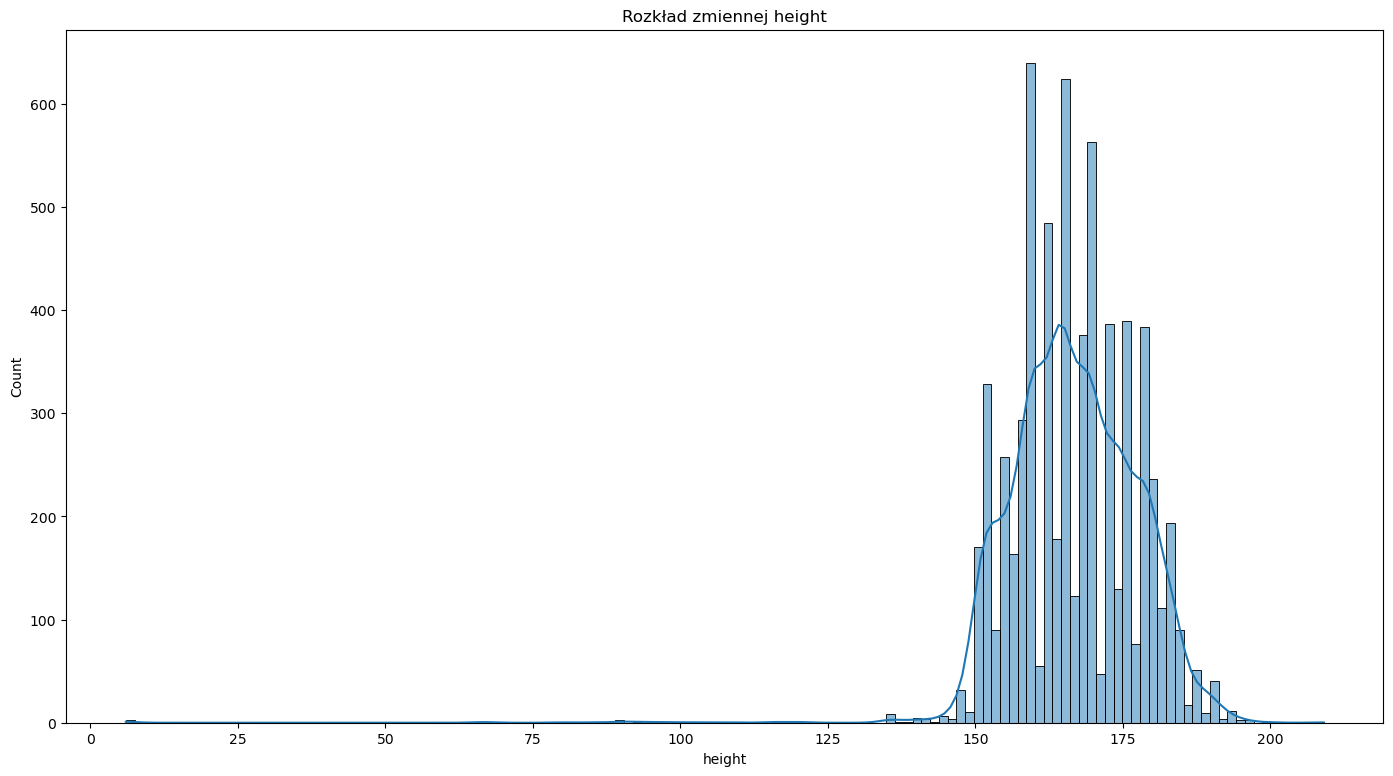

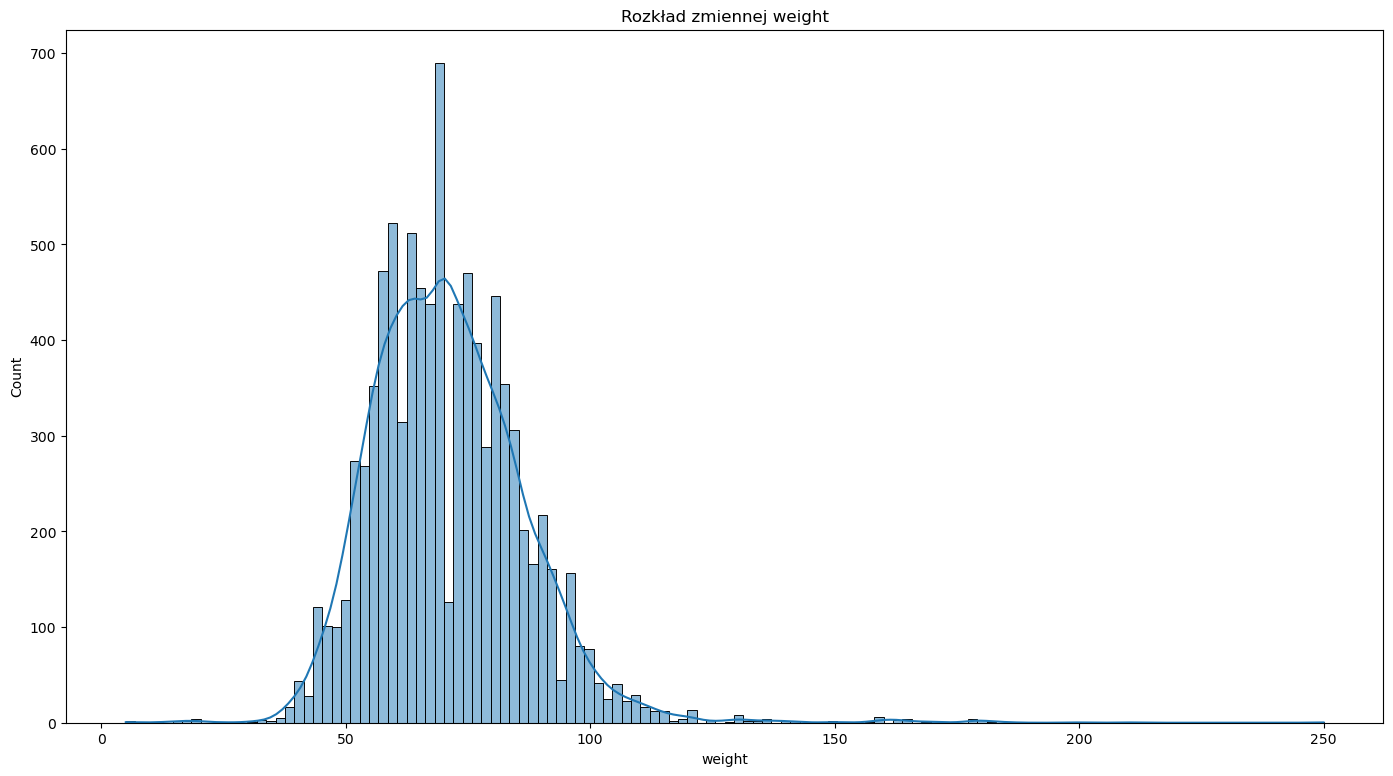

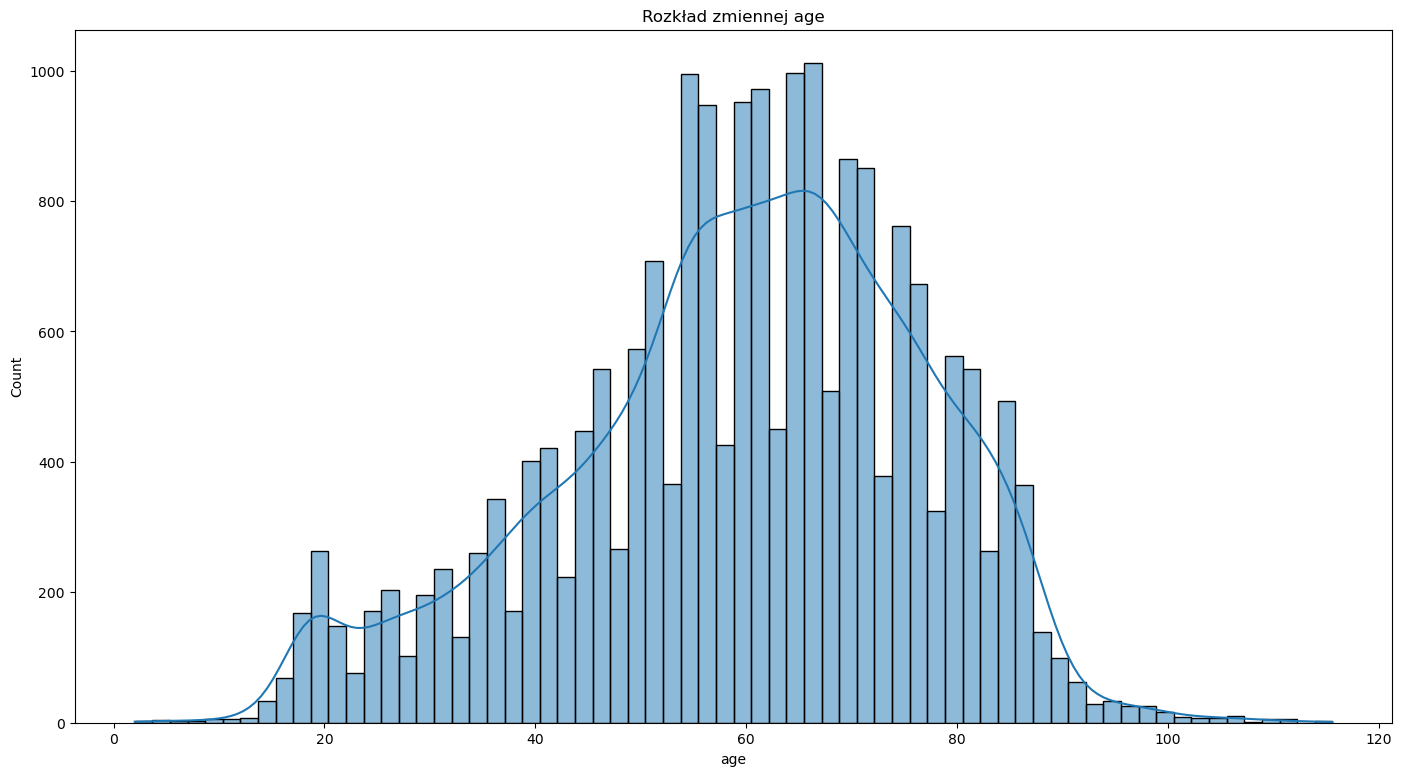

In [98]:
num_cols = ['height', 'weight', 'age']
for col in num_cols:
    plt.figure(figsize=(17,9))
    sns.histplot(db[col], kde = True)
    plt.title(f"Rozkład zmiennej {col}")
    plt.show()
    print("\n")

Na wykresie wieku od razu widac anomalie ze odleglym slupkiem odpowiadajacym pacjentom o rzekomym wieku równym 300 lat. Jest to konsekwencja anomizacji dancych pacjentow w danych medycznych gdzie osobom o wieku 90+ przypisuje sie taki właśnie wiek. My postaramy sie odtworzyc orygianalny rozkład wieku.

In [99]:
from scipy.stats import truncnorm

T = 90 
ages = db.loc[db['age'] < 300, 'age']  

mu = ages[ages < T].mean()
sd = ages[ages < T].std()

a, b = (T - mu) / sd, np.inf

n_missing = (db['age'] == 300).sum()

imputed_values = truncnorm.rvs(a, b, loc=mu, scale=sd, size=n_missing)

db.loc[db['age'] == 300, 'age'] = imputed_values

<Axes: xlabel='age', ylabel='Count'>

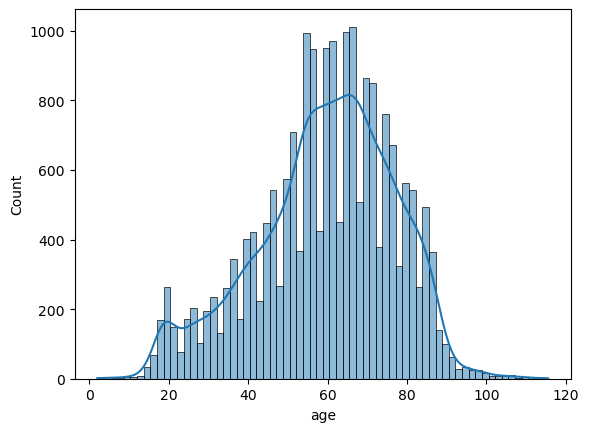

In [100]:
sns.histplot(db["age"], kde = True)

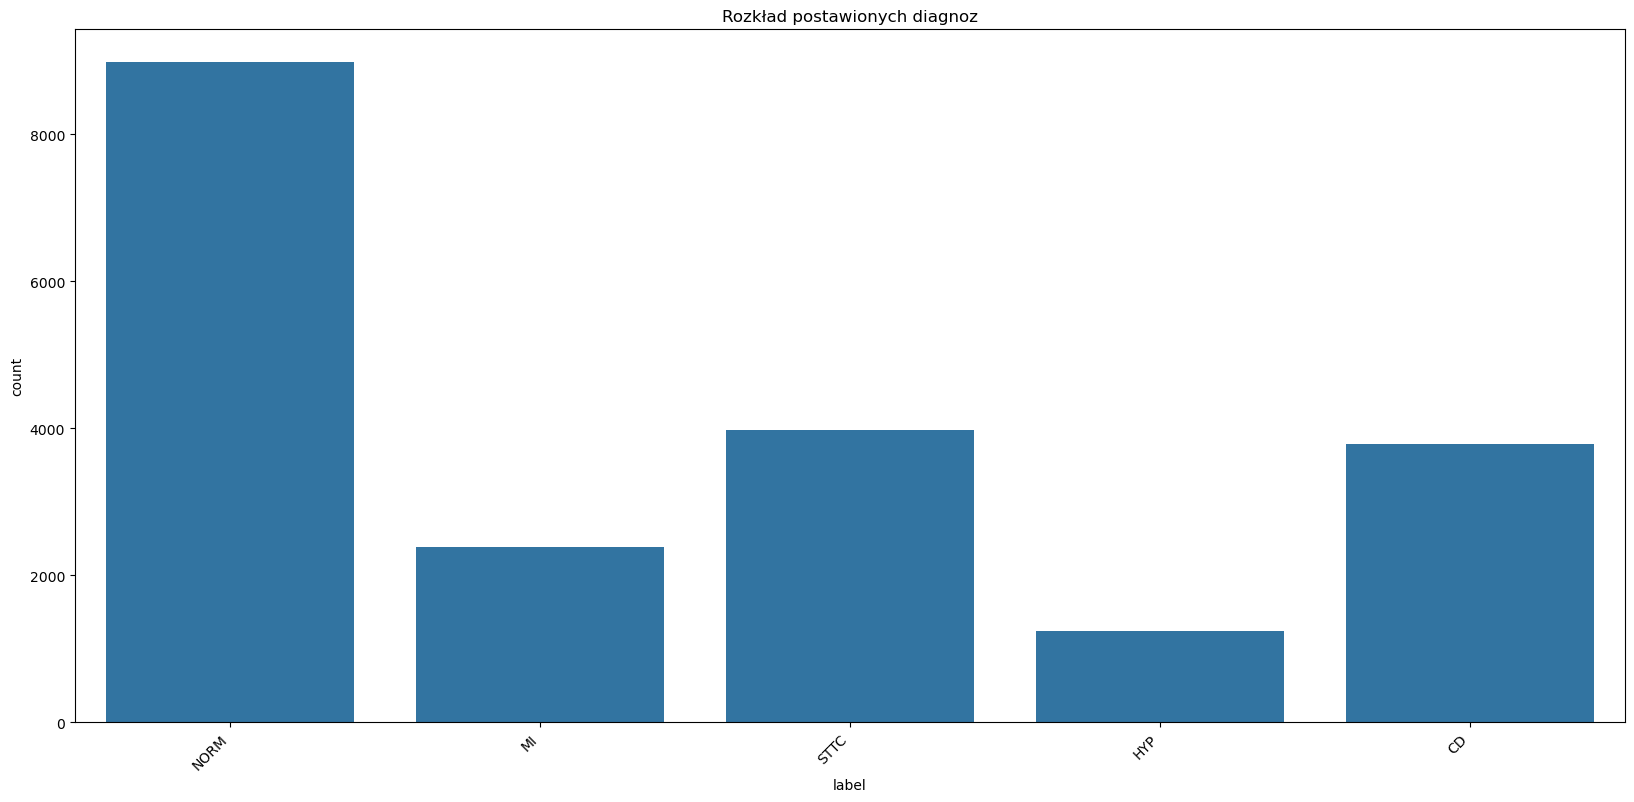

In [101]:
plt.figure(figsize=(20,9))
sns.countplot(data=db, x="label")
plt.title(f"Rozkład postawionych diagnoz")
plt.xticks(rotation=45, ha='right')
plt.show()
print("\n")

# Analiza danych dla poszczególnych klas 

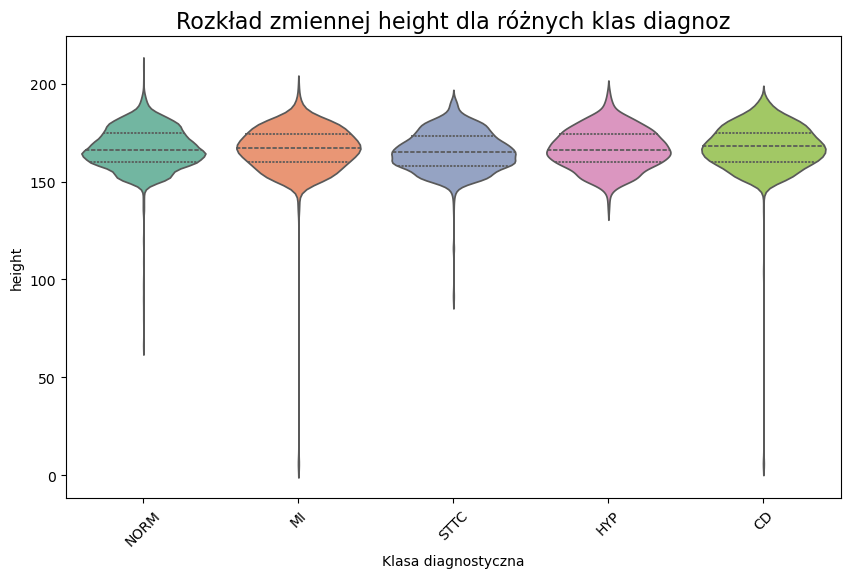

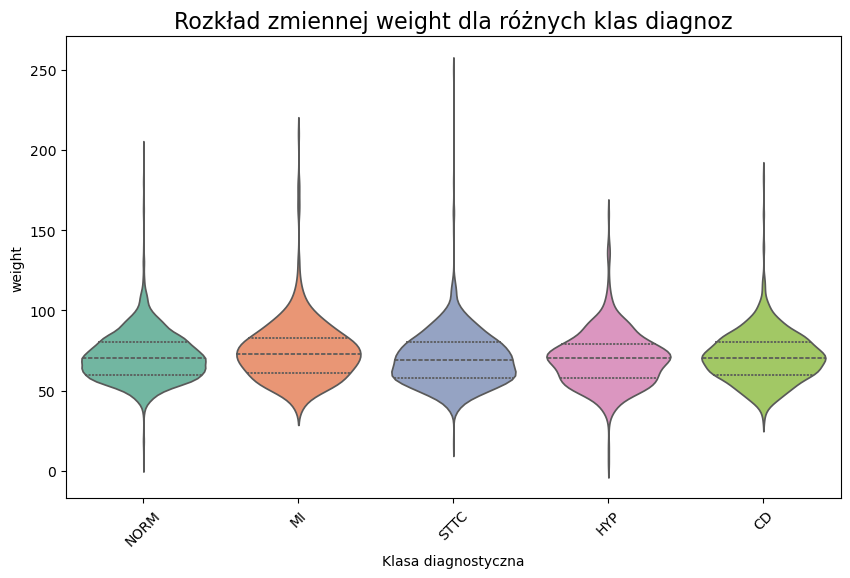

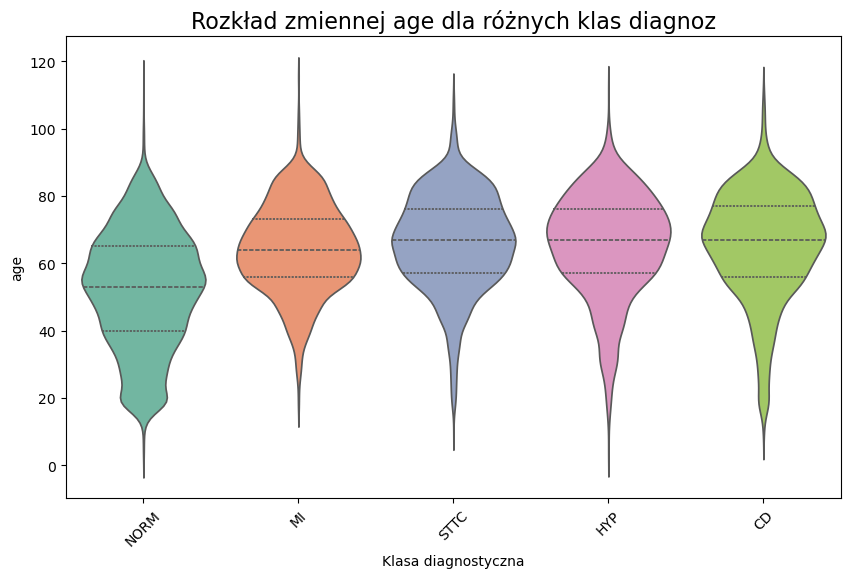

In [103]:
num_cols = ['height', 'weight', 'age']

for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.violinplot(
        data=db, 
        x='label', 
        y=col, 
        hue='label', 
        inner='quartile',
        palette='Set2', 
        legend=False
    )
    plt.title(f"Rozkład zmiennej {col} dla różnych klas diagnoz", fontsize=16)
    plt.xlabel("Klasa diagnostyczna")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()
    print("\n")

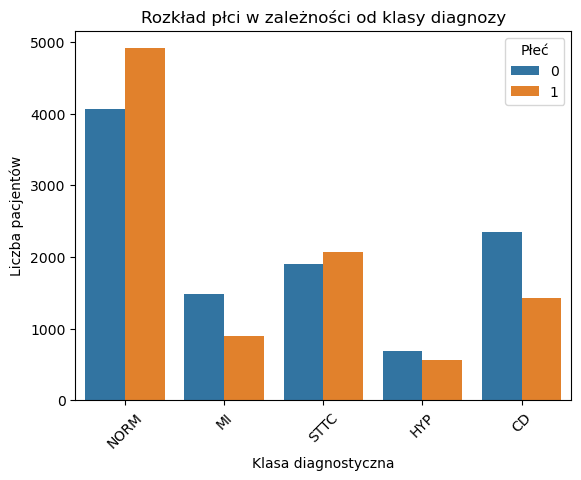

In [104]:
sns.countplot(data=db, x='label', hue='sex')
plt.title("Rozkład płci w zależności od klasy diagnozy")
plt.xlabel("Klasa diagnostyczna")
plt.ylabel("Liczba pacjentów")
plt.legend(title="Płeć")
plt.xticks(rotation=45)
plt.show()

# Analiza sygnałów

In [105]:
!pip install wfdb

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.9 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/15.9 MB 4.4 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/15.9 MB 4.5 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/15.9 MB 4.4 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/15.9 MB 4.5 MB/s eta 0:00:03
   ------------- -------------------------- 5.2/15.9 MB 4.6 MB/s eta 0:00:03
   --------------- ------------------------ 6.0/15.9 MB 4.5 MB/s eta 0:00:03
   ----------------- ---------------------- 6.8/15.9 MB 4.4 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/15.9 MB 4.3 MB/s eta 0:00:03
   ------------------- -------------------- 7.9/15.9 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 8.4/15.9 MB 3.9 MB/s eta 0:00:02
   -------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alibi 0.9.6 requires numpy<2.0.0,>=1.16.2, but you have numpy 2.0.2 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.0.2 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.0.2 which is incompatible.


In [107]:
import wfdb 

def plot_ecg_all_leads(record_path, title=""):
    record_path=os.path.join(PTB_DIR,record_path)
    signal, fields= wfdb.rdsamp(record_path)
    fs=fields["fs"]
    sig_names=fields["sig_name"]
    t= np.arange(signal.shape[0])/fs

    plt.figure(figsize=(12, 10))
    for i in range(signal.shape[1]):
        plt.subplot(4, 3, i+1)
        plt.plot(t, signal[:, i])
        plt.title(sig_names[i])
        plt.xlabel("Czas [s]")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

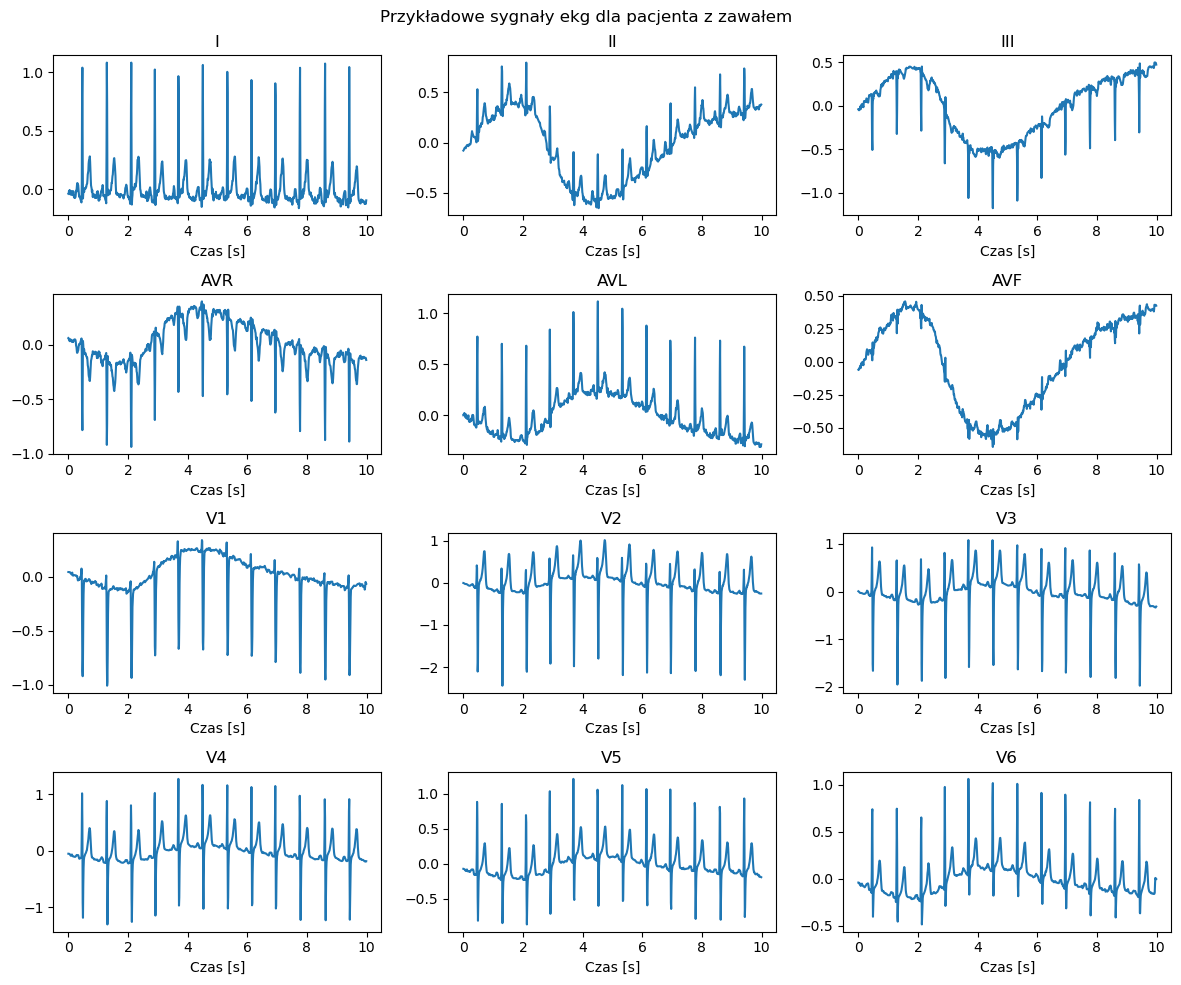

In [117]:
zawal = db[db["label"] == "MI"].iloc[0]["filename_lr"]

plot_ecg_all_leads(zawal,"Przykładowe sygnały ekg dla pacjenta z zawałem")

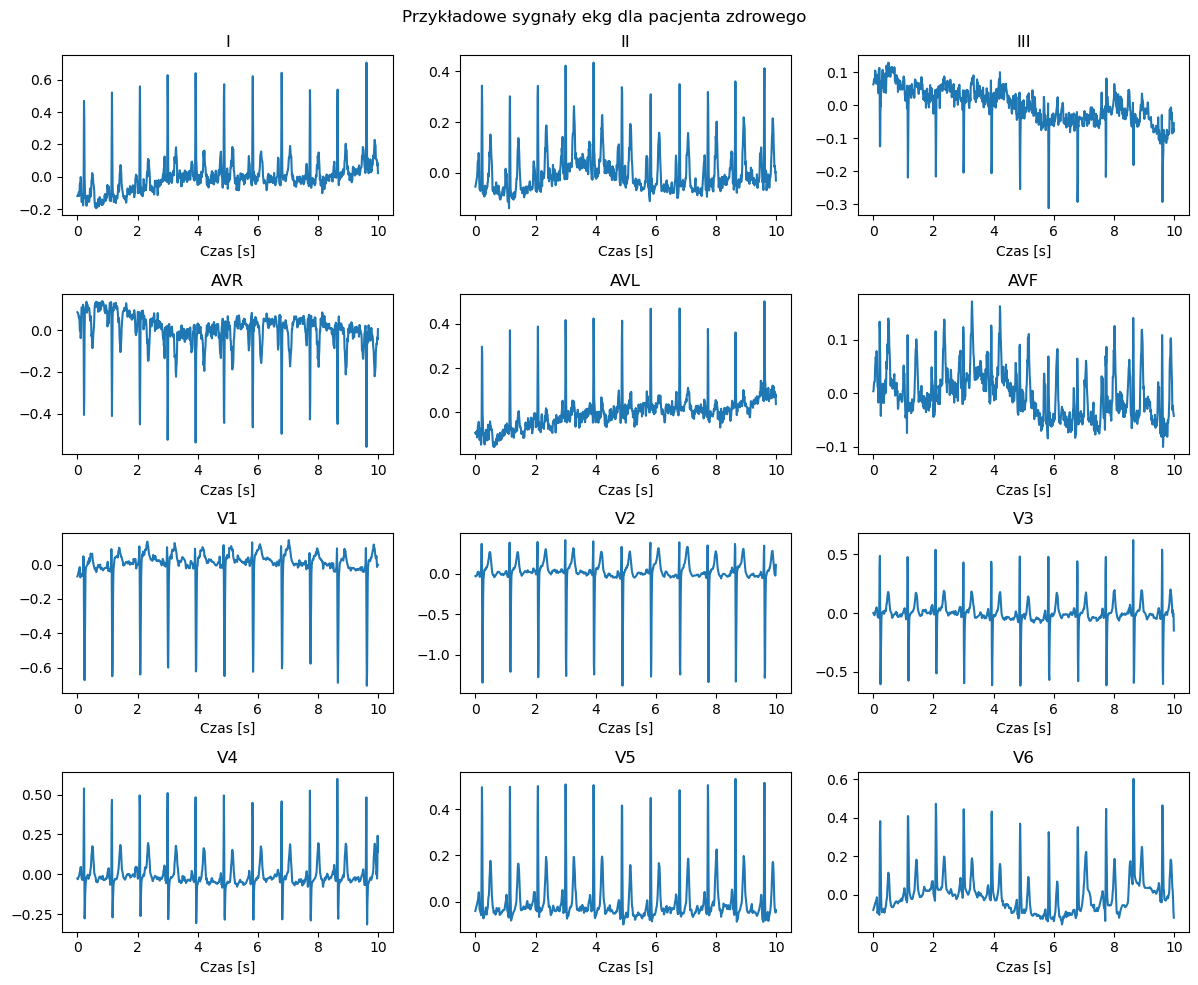

In [121]:
norm = db[db["label"] == "NORM"].iloc[0]["filename_lr"]

plot_ecg_all_leads(norm,"Przykładowe sygnały ekg dla pacjenta zdrowego")

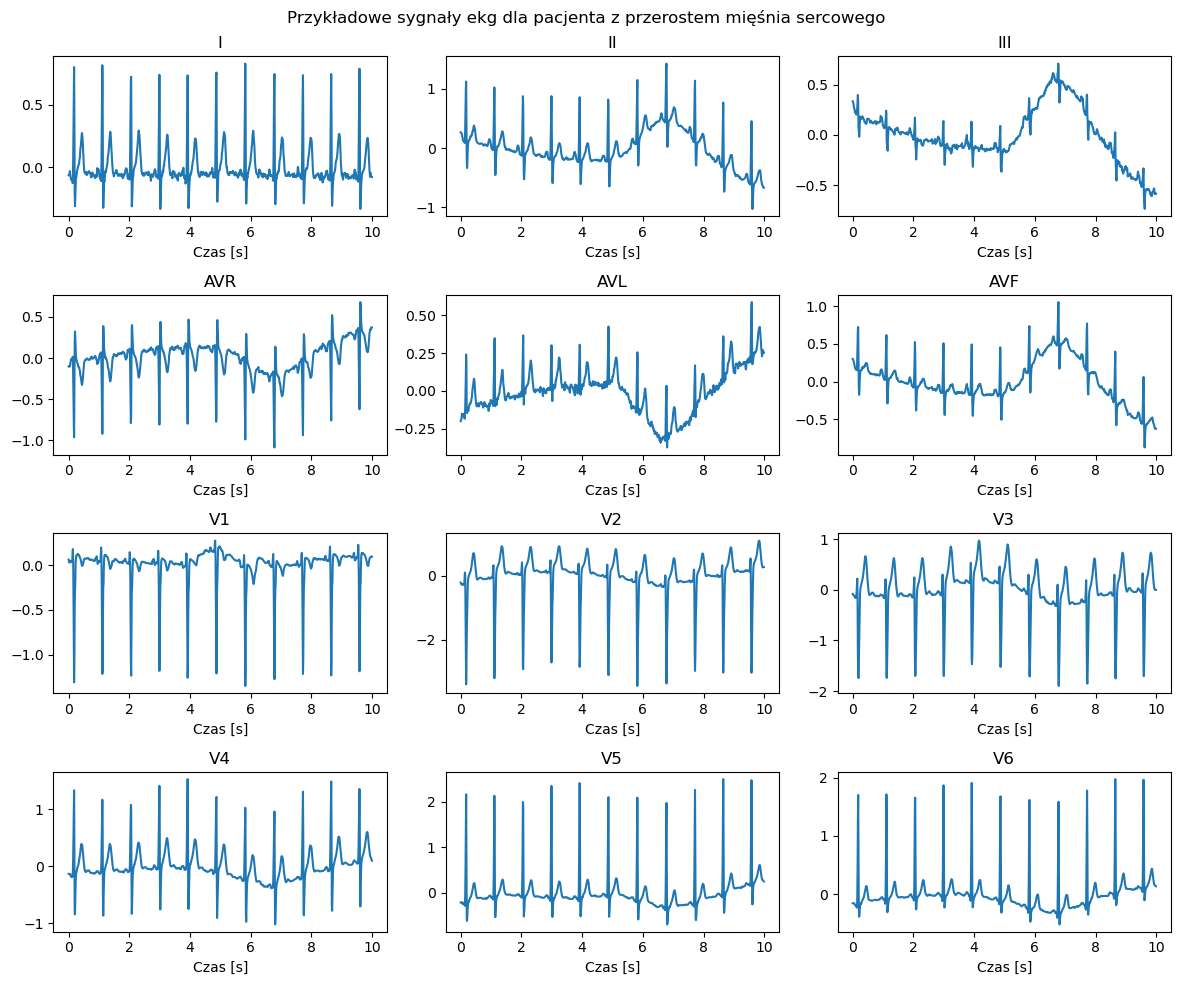

In [134]:
hyp = db[db["label"] == "HYP"].iloc[0]["filename_lr"]

plot_ecg_all_leads(hyp,"Przykładowe sygnały ekg dla pacjenta z przerostem mięśnia sercowego")

In [ ]:
def plot_single_lead(record_path, lead_name="II", t_min=0, t_max=10):
    signal, fields = wfdb.rdsamp(record_path)
    fs = fields['fs']
    sig_names = fields['sig_name']

    if lead_name not in sig_names:
        raise ValueError(f"Lead {lead_name} nie istnieje. Dostępne: {sig_names}")

    idx = sig_names.index(lead_name)
    t = np.arange(signal.shape[0]) / fs

    plt.figure(figsize=(10, 4))
    plt.plot(t, signal[:, idx])
    plt.xlim(t_min, t_max)
    plt.title(f"{lead_name} ({t_min}-{t_max} s)")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.grid(True, alpha=0.3)
    plt.show()

In [122]:
def load_lead(record_path, lead_name="V3"):
    record_path=os.path.join(PTB_DIR,record_path)

    signal, fields = wfdb.rdsamp(record_path)
    fs = fields["fs"]              
    sig_names = fields["sig_name"] 
    
    if lead_name not in sig_names:
        raise ValueError(f"Lead {lead_name} nie istnieje. Dostępne: {sig_names}")
    
    idx = sig_names.index(lead_name)
    lead_signal = signal[:, idx]  
    t = np.arange(len(lead_signal)) / fs 
    
    return lead_signal, t, fs

def extract_single_beat(lead_signal, fs, center_fraction=0.5, pre=0.4, post=0.6):
    """
    lead_signal : 1D numpy array
    fs          : częstotliwość próbkowania
    center_fraction : w jakiej części sygnału szukamy R (0.5 = środek)
    pre, post   : ile sekund przed i po R chcemy wyciąć
    """
    n = len(lead_signal)
    center_idx = int(n * center_fraction)
    
    search_radius = int(1.0 * fs)
    start = max(0, center_idx - search_radius)
    end   = min(n, center_idx + search_radius)
    
    local_segment = lead_signal[start:end]
    local_max_idx = np.argmax(local_segment)  
    r_idx = start + local_max_idx            
    
    # ile próbek przed i po chcemy
    pre_samples  = int(pre * fs)
    post_samples = int(post * fs)
    
    beat_start = max(0, r_idx - pre_samples)
    beat_end   = min(n, r_idx + post_samples)
    
    beat = lead_signal[beat_start:beat_end]
    t_beat = np.arange(len(beat)) / fs  
    
    r_rel_idx = r_idx - beat_start
    
    return beat, t_beat, r_rel_idx

def compare_single_beat(mi_path, norm_path, lead_name="V3"):
    mi_signal, _, fs_mi = load_lead(mi_path, lead_name)
    norm_signal, _, fs_norm = load_lead(norm_path, lead_name)
    
    assert fs_mi == fs_norm, "Różne fs, tu zakładamy to samo"
    fs = fs_mi
    
    mi_beat, mi_t, mi_r = extract_single_beat(mi_signal, fs)
    norm_beat, norm_t, norm_r = extract_single_beat(norm_signal, fs)
    
    plt.figure(figsize=(10, 4))
    plt.plot(mi_t, mi_beat, label="MI (zawał)")
    plt.plot(norm_t, norm_beat, label="NORM (zdrowy)")
    
    plt.axvline(mi_r / fs, color="C0", linestyle="--", alpha=0.4)
    plt.axvline(norm_r / fs, color="C1", linestyle="--", alpha=0.4)
    
    plt.title(f"Porównanie pojedynczego uderzenia – lead {lead_name}")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


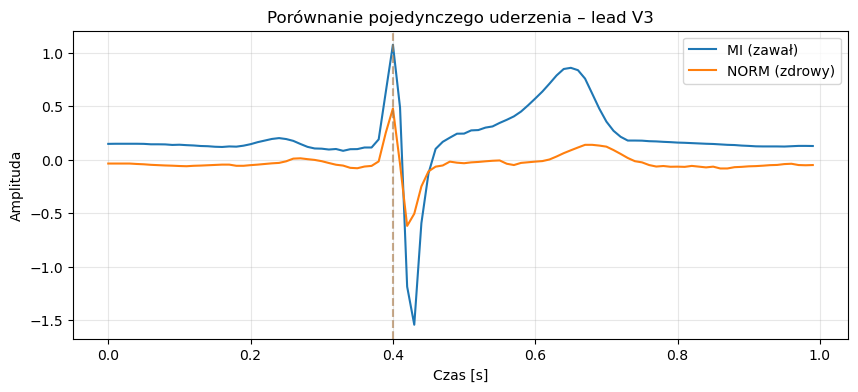

In [123]:
compare_single_beat(zawal, norm, lead_name="V3")

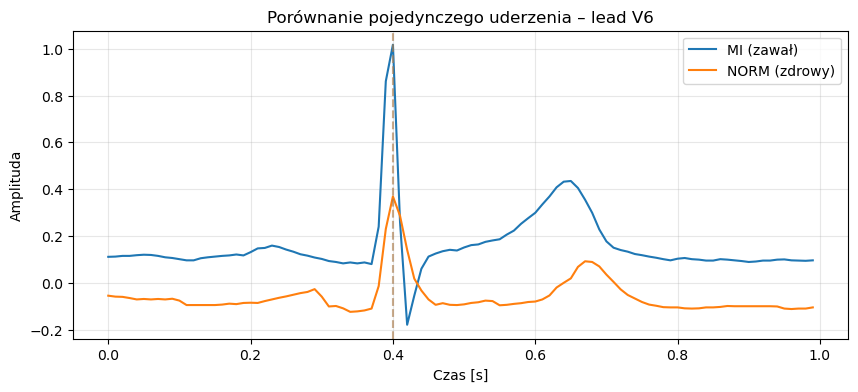

In [128]:
compare_single_beat(zawal, norm, lead_name="V6")

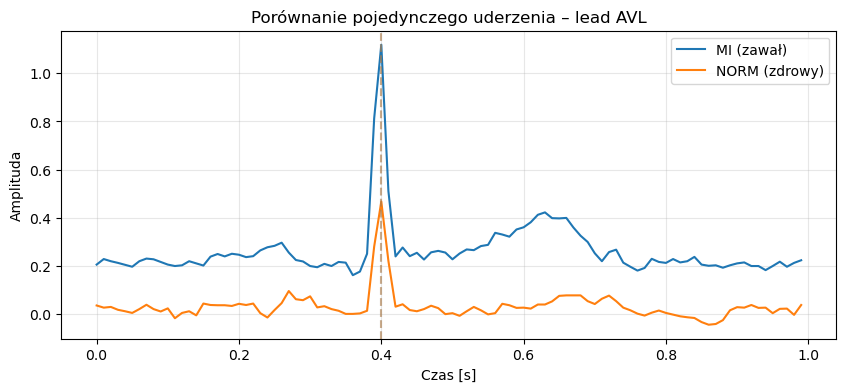

In [131]:
compare_single_beat(zawal, norm, lead_name="AVL")

In [137]:

def compute_features(sig):
    # mean
    mean_val = np.mean(sig)
    # variance
    var_val = np.var(sig)
    # energy (sum of squares)
    energy_val = np.sum(sig**2)
    # peak-to-mean ratio (max amplitude / mean of abs values)
    p2m_val = np.max(np.abs(sig)) / (np.mean(np.abs(sig)) + 1e-6)
    return mean_val, var_val, energy_val, p2m_val

import random

def sample_records(db, label, n=50):
    recs = db.loc[db["label"] == label, "filename_lr"].sample(n, random_state=42).tolist()
    return recs

import wfdb

def compute_class_features(db, label, leads=["V2","V3","V5"], n=50):
    paths = sample_records(db, label, n)
    results = []

    for path in paths:
        signal, fields = wfdb.rdsamp(os.path.join(PTB_DIR,path))
        sig_names = fields["sig_name"]
        
        for lead in leads:
            if lead in sig_names:
                idx = sig_names.index(lead)
                sig = signal[:, idx]
                mean_val, var_val, energy_val, p2m_val = compute_features(sig)
                
                results.append({
                    "label": label,
                    "lead": lead,
                    "mean": mean_val,
                    "variance": var_val,
                    "energy": energy_val,
                    "peak2mean": p2m_val
                })
    return results

In [140]:
all_results = []
for lab in ["NORM", "MI", "STTC", "HYP", "CD"]:
    all_results.extend(compute_class_features(db, lab))

import pandas as pd
eda_df = pd.DataFrame(all_results)
print(eda_df.head())
print(len(eda_df))

  label lead      mean  variance     energy  peak2mean
0  NORM   V2  0.000339  0.068131  68.130985  10.627940
1  NORM   V3 -0.003604  0.040610  40.622584   8.590181
2  NORM   V5  0.001392  0.017069  17.070594  10.793745
3  NORM   V2 -0.001340  0.070112  70.113426   8.685707
4  NORM   V3 -0.003183  0.025131  25.140903   7.172170
750


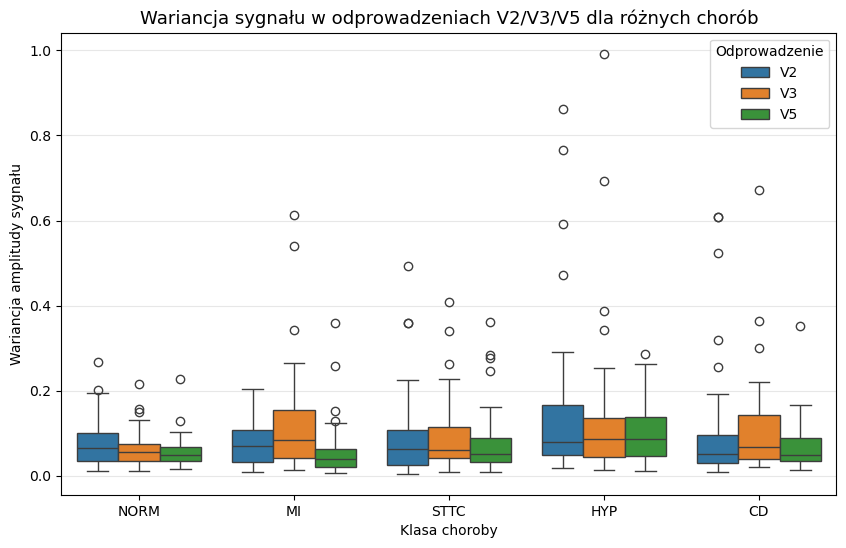

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=eda_df, x="label", y="variance", hue="lead")
plt.title("Wariancja sygnału w odprowadzeniach V2/V3/V5 dla różnych chorób", fontsize=13)
plt.xlabel("Klasa choroby")
plt.ylabel("Wariancja amplitudy sygnału")
plt.legend(title="Odprowadzenie")
plt.grid(axis="y", alpha=0.3)
plt.show()


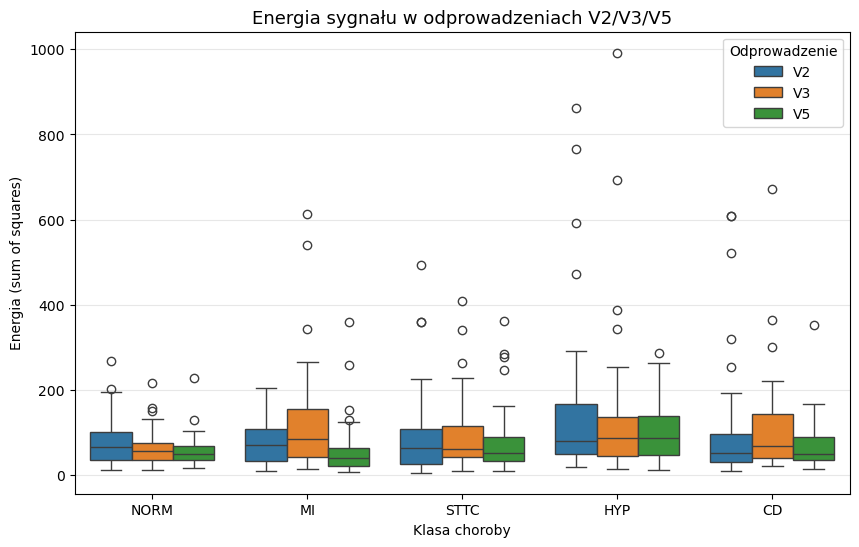

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(data=eda_df, x="label", y="energy", hue="lead")
plt.title("Energia sygnału w odprowadzeniach V2/V3/V5", fontsize=13)
plt.xlabel("Klasa choroby")
plt.ylabel("Energia (sum of squares)")
plt.legend(title="Odprowadzenie")
plt.grid(axis="y", alpha=0.3)
plt.show()

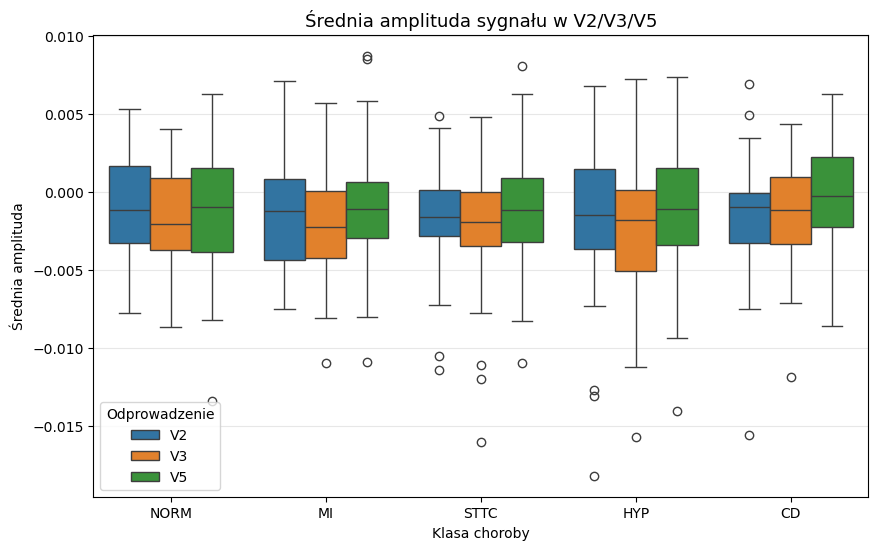

In [143]:
plt.figure(figsize=(10,6))
sns.boxplot(data=eda_df, x="label", y="mean", hue="lead")
plt.title("Średnia amplituda sygnału w V2/V3/V5", fontsize=13)
plt.xlabel("Klasa choroby")
plt.ylabel("Średnia amplituda")
plt.legend(title="Odprowadzenie")
plt.grid(axis="y", alpha=0.3)
plt.show()

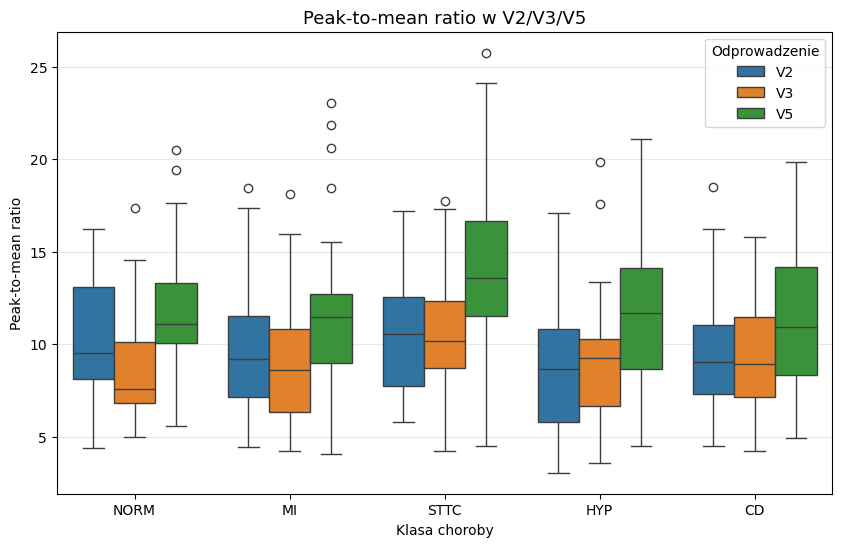

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(data=eda_df, x="label", y="peak2mean", hue="lead")
plt.title("Peak-to-mean ratio w V2/V3/V5", fontsize=13)
plt.xlabel("Klasa choroby")
plt.ylabel("Peak-to-mean ratio")
plt.legend(title="Odprowadzenie")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def simple_psd(sig, fs):
    """
    Prosty szacunek gęstości mocy:
    - okno Hanninga
    - FFT jedynie po częstotliwościach dodatnich (rfft)
    """
    n = len(sig)
    window = np.hanning(n)
    sig_w = sig * window

    # FFT tylko dodatnich częstotliwości
    fft_vals = np.fft.rfft(sig_w)
    freqs = np.fft.rfftfreq(n, d=1/fs)

    # PSD ~ |X(f)|^2 / (fs * N)  (prosty, nieskalibrowany)
    psd = (np.abs(fft_vals) ** 2) / (fs * n)
    return freqs, psd

def compare_fft_no_scipy(mi_path, norm_path, lead="V3"):
    sig_mi, _, fs_mi = load_lead(mi_path, lead)
    sig_norm, _, fs_norm = load_lead(norm_path, lead)

    assert fs_mi == fs_norm
    fs = fs_mi

    freqs_mi, psd_mi = simple_psd(sig_mi, fs)
    freqs_norm, psd_norm = simple_psd(sig_norm, fs)

    plt.figure(figsize=(10,5))
    plt.semilogy(freqs_mi, psd_mi, label="MI (zawał)")
    plt.semilogy(freqs_norm, psd_norm, label="NORM (zdrowy)")
    plt.title(f"Widmo sygnału (prosty PSD) – lead {lead}")
    plt.xlabel("Częstotliwość [Hz]")
    plt.ylabel("Gęstość mocy (log skala)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xlim(0, 40)  # do 40 Hz zwykle wystarczy dla EKG
    plt.show()


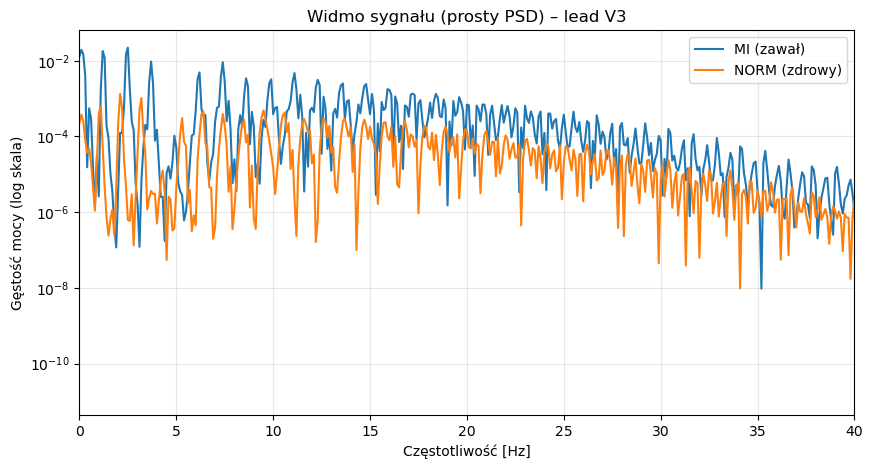

In [148]:
compare_fft_no_scipy(zawal, norm, lead="V3")